## Jayden Yap Jean Hng p2112790 Part A Time Series

### Data Cleaning

In [17]:
#dependencies
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import statsmodels

In [18]:
dfTrain=pd.read_csv('data/train.csv')
dfTest=pd.read_csv('data/test.csv')
#drop unnamed columns
dfTrain.drop(['Unnamed: 5','Unnamed: 6'],inplace=True,axis=1)
dfTest.drop(['Unnamed: 5','Unnamed: 6'],inplace=True,axis=1)
display(dfTrain)
display(dfTest)

,Date,T,RH,Gas,Value
0,15/3/2016,12.020833,54.883334,CO,1053.200000
1,16/3/2016,9.833333,64.069791,CO,995.250000
2,17/3/2016,11.292708,51.107292,CO,1025.250000
3,18/3/2016,12.866319,51.530903,CO,1064.444444
4,19/3/2016,16.016667,48.843750,CO,1088.741667
...,...,...,...,...,...
1307,1/2/2017,5.267708,39.614930,O3,553.180556
1308,2/2/2017,-55.515972,-24.010417,O3,343.500000
1309,3/2/2017,-14.272917,28.563542,O3,334.458333
1310,4/2/2017,4.848611,37.832986,O3,379.513889


,id,Date,T,RH,Gas
0,0,6/2/2017,6.616667,51.734375,CO
1,1,7/2/2017,7.613194,43.930903,CO
2,2,8/2/2017,7.252083,50.966667,CO
3,3,9/2/2017,7.473611,50.166319,CO
4,4,10/2/2017,5.571875,46.604167,CO
...,...,...,...,...,...
247,247,5/4/2017,17.554167,50.092708,O3
248,248,6/4/2017,15.919792,35.959722,O3
249,249,7/4/2017,15.489583,32.213542,O3
250,250,8/4/2017,18.381250,33.686458,O3


In [19]:
#change time to index
dfTrain['Date'] = pd.to_datetime(dfTrain['Date'],dayfirst=True)
dfTrain['Date'] = [time.date() for time in dfTrain['Date']]
dfTest['Date'] = pd.to_datetime(dfTest['Date'],dayfirst=True)
dfTest['Date'] = [time.date() for time in dfTest['Date']]

In [40]:
#pivot 'gas' column
df1=pd.pivot(index='Date',columns='Gas',values='Value',data=dfTrain)
#now add back T and RH columns
dfData=dfTrain[dfTrain['Gas'].isin(['CO'])]
dfData.set_index('Date',inplace=True)
df1=pd.concat([df1,dfData[['T','RH']]],axis=1)
df1=df1[['T','RH','CO','HC','NO2','O3']]

,T,RH,CO,HC,NO2,O3
Date,,,,,,
2016-03-15,12.020833,54.883334,1053.200000,729.800000,933.800000,876.833333
2016-03-16,9.833333,64.069791,995.250000,681.441667,1021.750000,708.025000
2016-03-17,11.292708,51.107292,1025.250000,806.583333,881.375000,867.375000
2016-03-18,12.866319,51.530903,1064.444444,794.258333,794.527778,996.625000
2016-03-19,16.016667,48.843750,1088.741667,755.083333,800.883333,987.341667
...,...,...,...,...,...,...
2017-02-01,5.267708,39.614930,729.422222,562.650000,797.647222,553.180556
2017-02-02,-55.515972,-24.010417,474.291667,347.480556,508.180556,343.500000
2017-02-03,-14.272917,28.563542,615.700000,414.475000,819.733333,334.458333


In [21]:
#now for test set
dfTest=dfTest[dfTest['Gas'].isin(['CO'])]
dfTest.drop(['id','Gas'],axis=1,inplace=True)
dfTest.set_index('Date',drop=True,inplace=True)
dfTest
#add gas columns later for values

,T,RH
Date,,
2017-02-06,6.616667,51.734375
2017-02-07,7.613194,43.930903
2017-02-08,7.252083,50.966667
2017-02-09,7.473611,50.166319
2017-02-10,5.571875,46.604167
...,...,...
2017-04-05,17.554167,50.092708
2017-04-06,15.919792,35.959722
2017-04-07,15.489583,32.213542


### Data Visualisation

#### General Visualisations 

Check relationships between variables

<AxesSubplot:xlabel='RH', ylabel='Value'>

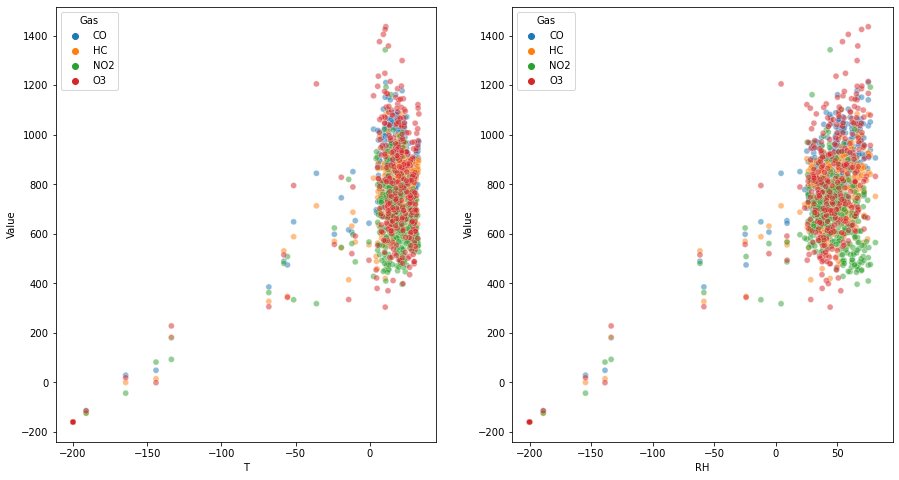

In [22]:
#plots to analyse relationships between variables
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x="T",y="Value", alpha=0.5, hue="Gas",data=dfTrain)
plt.subplot(1,2,2)
sns.scatterplot(x="RH",y="Value", alpha=0.5, hue="Gas",data=dfTrain)

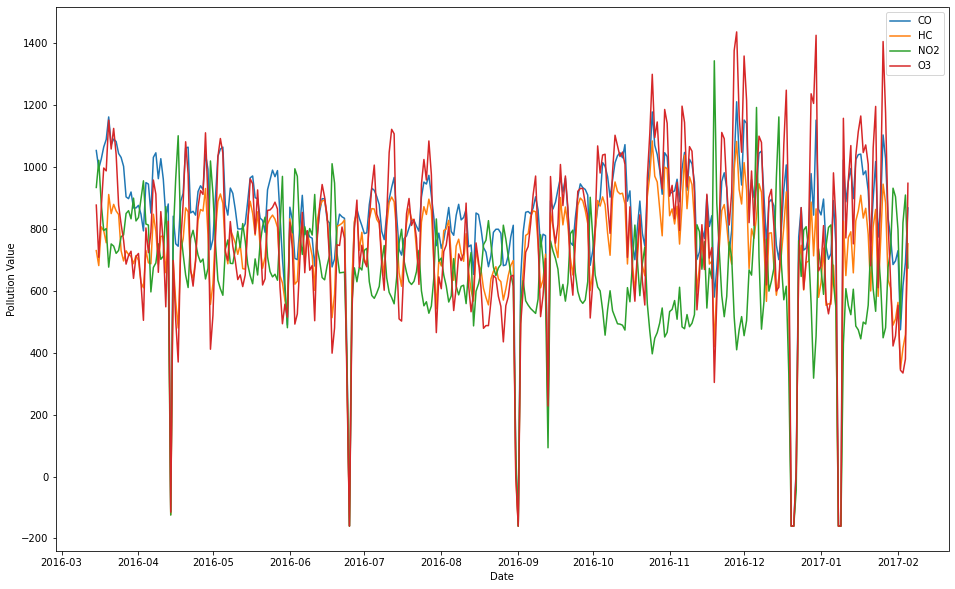

In [23]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['CO'], label='CO')
plt.plot(df1.index,df1['HC'], label='HC')
plt.plot(df1.index,df1['NO2'], label='NO2')
plt.plot(df1.index,df1['O3'] , label='O3')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()
#some noise, especially with the points where value drops below 0, these are extreme cases of weather and we should keep them

Text(0, 0.5, 'Temperature')

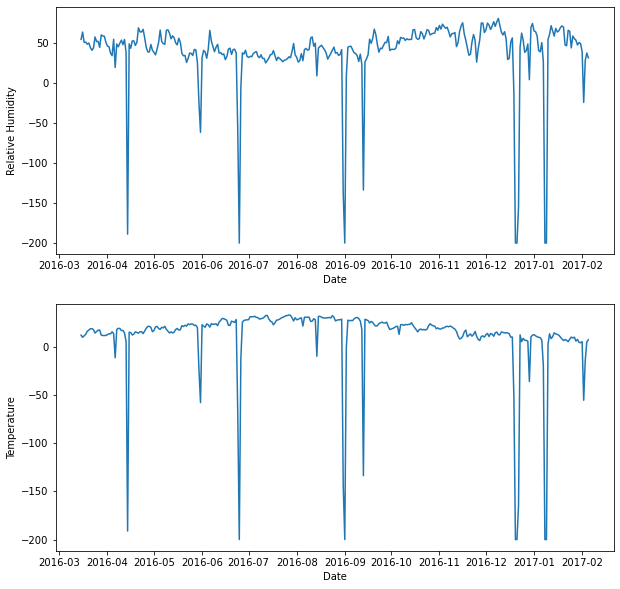

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(df1.index,df1['RH'])
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.subplot(2,1,2)
plt.plot(df1.index,df1['T'])
plt.xlabel('Date')
plt.ylabel('Temperature')

#### Stationarity Test

In [25]:
#statistical test for stationarity
from statsmodels.tsa.stattools import adfuller 
adftest=adfuller(df1['CO'])
print('CO results')
print('number of observations: ',adftest[3],'\np-value: ',adftest[1])
if adftest[1]>0.05:
    print('Non-stationary')
else: 
    print('Stationary') 

adftest=adfuller(df1['HC'])
print('\nHC results')
print('number of observations: ',adftest[3],'\np-value: ',adftest[1])
if adftest[1]>0.05:
    print('Non-stationary')
else: 
    print('Stationary') 

    
adftest=adfuller(df1['NO2'])
print('\nNO2 results')
print('number of observations: ',adftest[3],'\np-value: ',adftest[1])
if adftest[1]>0.05:
    print('Non-stationary')
else: 
    print('Stationary') 

adftest=adfuller(df1['O3'])
print('\nO3 results')
print('number of observations: ',adftest[3],'\np-value: ',adftest[1])
if adftest[1]>0.05:
    print('Non-stationary')
else: 
    print('Stationary') 

#all are stationary

CO results
number of observations:  326 
p-value:  2.6870035539955553e-16
Stationary

HC results
number of observations:  326 
p-value:  1.2969233046266435e-16
Stationary

NO2 results
number of observations:  326 
p-value:  1.37892389148064e-17
Stationary

O3 results
number of observations:  326 
p-value:  2.3141897784386734e-16
Stationary


#### Seasonal Decompose

check Trend and Seasonality

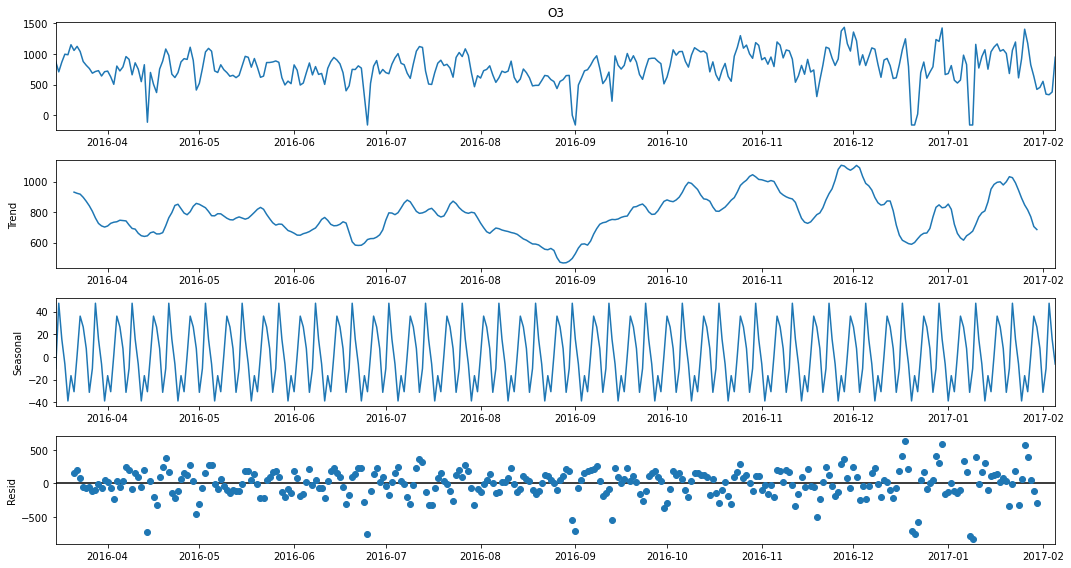

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result=seasonal_decompose(df1['O3'],model='additive',period=12)
fig=result.plot()
fig.set_size_inches((15,8))
fig.tight_layout()
plt.show()
#seasonal period is 7-8 days

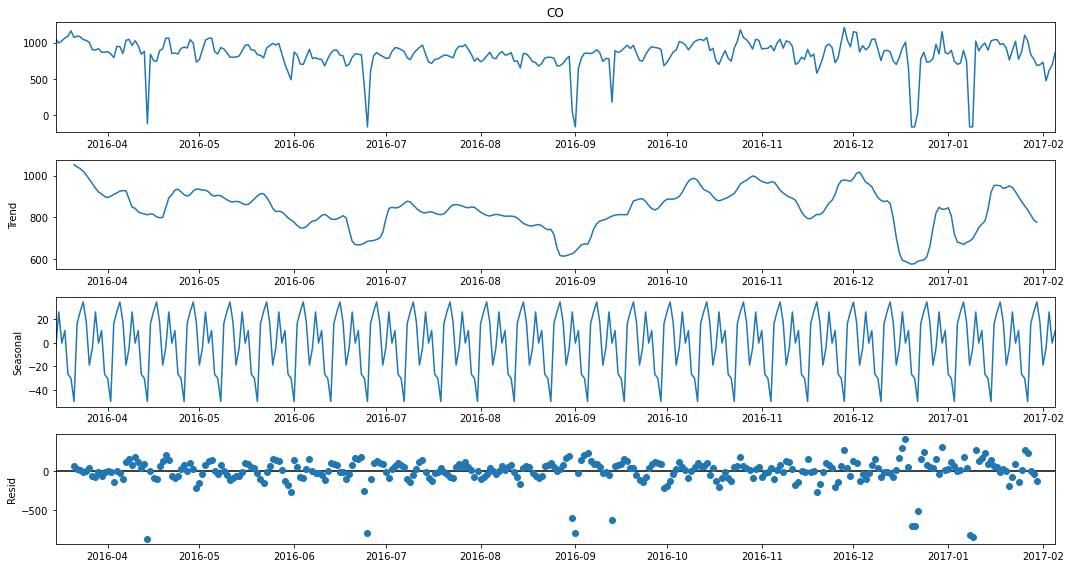

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result=seasonal_decompose(df1['CO'],model='additive',period=12)
fig=result.plot()
fig.set_size_inches((15,8))
fig.tight_layout()
plt.show()
#seasonal period is 7-8 days

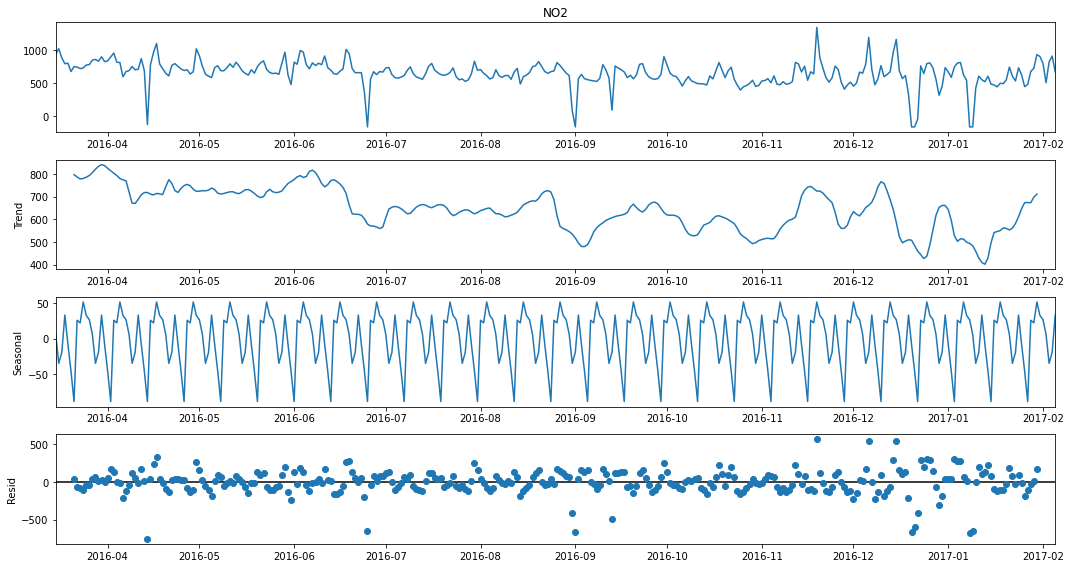

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result=seasonal_decompose(df1['NO2'],model='additive',period=12)
fig=result.plot()
fig.set_size_inches((15,8))
fig.tight_layout()
plt.show()
##seasonal period is 7-8 days

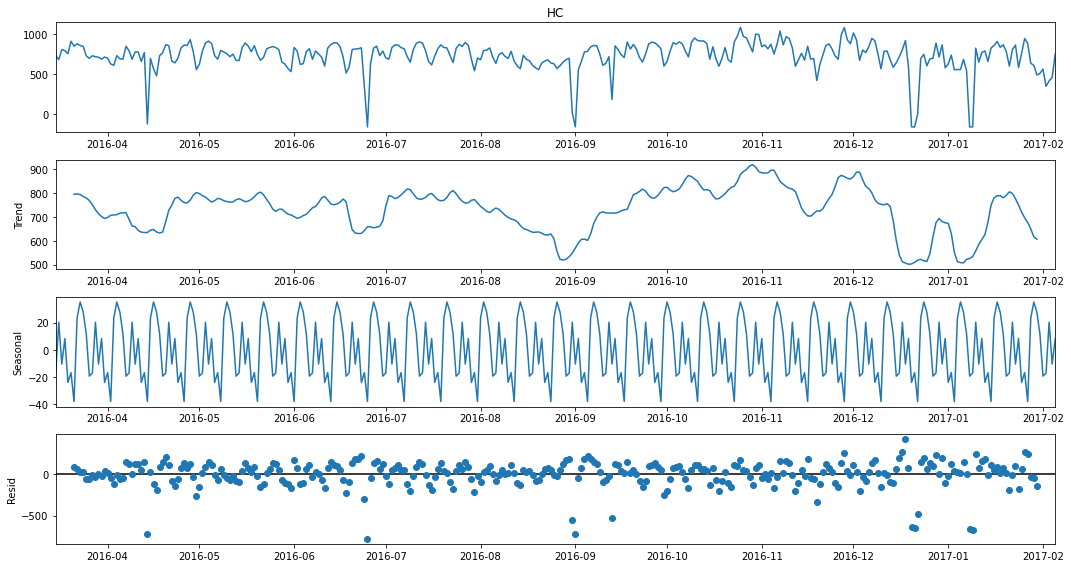

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result=seasonal_decompose(df1['HC'],model='additive',period=12)
fig=result.plot()
fig.set_size_inches((15,8))
fig.tight_layout()
plt.show()
##seasonal period is 7-8 days

### Try Models
split our 'train' data into training and test data
(actual 'test' set has no values to test and is for kaggle submission)

In [30]:
trainSet, testSet= np.split(df1, [int(.75 *len(df1))])
from statsmodels.tools.eval_measures import rmse
testSet.info()
trainSet.info()
#82 test days

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 2016-11-16 to 2017-02-05
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       82 non-null     float64
 1   RH      82 non-null     float64
 2   CO      82 non-null     float64
 3   HC      82 non-null     float64
 4   NO2     82 non-null     float64
 5   O3      82 non-null     float64
dtypes: float64(6)
memory usage: 4.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 2016-03-15 to 2016-11-15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       246 non-null    float64
 1   RH      246 non-null    float64
 2   CO      246 non-null    float64
 3   HC      246 non-null    float64
 4   NO2     246 non-null    float64
 5   O3      246 non-null    float64
dtypes: float64(6)
memory usage: 13.5+ KB


##### Exponential Smoothing

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1=ExponentialSmoothing(trainSet['O3'],trend='additive',seasonal='additive',seasonal_periods=7).fit()
pred1=model1.forecast(82)
score=rmse(testSet['O3'],pred1)
print('**********O3 Results*********')
print('AIC Score: ' +str(model1.aic))
print('BIC Score: ' +str(model1.bic))
print('RMSE Score: ' +str(score))

model2=ExponentialSmoothing(trainSet['CO'],trend='additive',seasonal='additive',seasonal_periods=7).fit()
pred2=model2.forecast(82)
score=rmse(testSet['CO'],pred2)
print('\n**********CO Results*********')
print('AIC Score: ' +str(model2.aic))
print('BIC Score: ' +str(model2.bic))
print('RMSE Score: ' +str(score))

model3=ExponentialSmoothing(trainSet['NO2'],trend='additive',seasonal='additive',seasonal_periods=7).fit()
pred3=model3.forecast(82)
score=rmse(testSet['NO2'],pred3)
print('\n**********NO2 Results*********')
print('AIC Score: ' +str(model3.aic))
print('BIC Score: ' +str(model3.bic))
print('RMSE Score: ' +str(score))

model4=ExponentialSmoothing(trainSet['HC'],trend='additive',seasonal='additive',seasonal_periods=7).fit()
pred4=model4.forecast(82)
score=rmse(testSet['HC'],pred4)
print('\n**********HC Results*********')
print('AIC Score: ' +str(model4.aic))
print('BIC Score: ' +str(model4.bic))
print('RMSE Score: ' +str(score))

**********O3 Results*********
AIC Score: 2597.174768953152
BIC Score: 2635.733415848408
RMSE Score: 803.6652486981592

**********CO Results*********
AIC Score: 2516.9100305599354
BIC Score: 2555.4686774551915
RMSE Score: 314.36473051202773

**********NO2 Results*********
AIC Score: 2500.52193486586
BIC Score: 2539.0805817611163
RMSE Score: 321.11379779580676

**********HC Results*********
AIC Score: 2477.3044971222
BIC Score: 2515.863144017456
RMSE Score: 262.45659392096394


##### ARIMA
able to use Exogenous variables (Temperature and Humidity)

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(trainSet['O3'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred1=model1.forecast(82,exog=testSet[['T','RH']]
)
score1=rmse(testSet['O3'],pred1)
print('**********O3 Results*********')
print('AIC Score: ' +str(model1.aic))
print('BIC Score: ' +str(model1.bic))
print('RMSE Score: ' +str(score1))

model2=ARIMA(trainSet['CO'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred2=model2.forecast(82,exog=testSet[['T','RH']]
)
score2=rmse(testSet['CO'],pred2)
print('\n**********CO Results*********')
print('AIC Score: ' +str(model2.aic))
print('BIC Score: ' +str(model2.bic))
print('RMSE Score: ' +str(score2))

model3=ARIMA(trainSet['NO2'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred3=model3.forecast(82,exog=testSet[['T','RH']]
)
score3=rmse(testSet['NO2'],pred3)
print('\n**********NO2 Results*********')
print('AIC Score: ' +str(model3.aic))
print('BIC Score: ' +str(model3.bic))
print('RMSE Score: ' +str(score3))

model4=ARIMA(trainSet['HC'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred4=model4.forecast(82,exog=testSet[['T','RH']]
)
score4=rmse(testSet['HC'],pred4)
print('\n**********HC Results*********')
print('AIC Score: ' +str(model4.aic))
print('BIC Score: ' +str(model4.bic))
print('RMSE Score: ' +str(score4))

print('\nAVG RMSE: '+str((score1+score2+score3+score4)/4))

**********O3 Results*********
AIC Score: 3245.446658686754
BIC Score: 3259.467984830483
RMSE Score: 255.120792450282

**********CO Results*********
AIC Score: 2949.66327347678
BIC Score: 2963.6845996205093
RMSE Score: 107.32668584285169

**********NO2 Results*********
AIC Score: 3099.7517749658596
BIC Score: 3113.773101109589
RMSE Score: 178.58043060368323

**********HC Results*********
AIC Score: 2978.858460937063
BIC Score: 2992.879787080792
RMSE Score: 128.53286317521983

AVG RMSE: 167.3901930180092


Hyperparameters (No Seasonal)

In [34]:
def evaluate_models(gas_name, p_values, d_values, q_values):
	best_score=float('inf')
	best_cfg=None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				currentOrder = (p,d,q)
				model=ARIMA(trainSet[gas_name],exog=trainSet[['T','RH']],enforce_stationarity=True,order=currentOrder).fit()
				pred=model.forecast(82,exog=testSet[['T','RH']])
				score=rmse(testSet[gas_name],pred)
				if score< best_score:
					best_score, best_cfg = score, currentOrder
				#print('ARIMA%s RMSE=%.3f' % (currentOrder,score))
	print(f'Best ARIMA{best_cfg} for {gas_name} RMSE={best_score}')
	return best_score

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 2)
q_values = [0, 1, 2, 4, 6, 8, 10]
warnings.filterwarnings("ignore")
score1=evaluate_models('O3', p_values, d_values, q_values)
score2=evaluate_models('CO', p_values, d_values, q_values)
score3=evaluate_models('NO2', p_values, d_values, q_values)
score4=evaluate_models('HC', p_values, d_values, q_values)
print(f"AVG RMSE: {(score1+score2+score3+score4)/4}")

Best ARIMA(0, 0, 0) for O3 RMSE=255.120792450282
Best ARIMA(2, 0, 6) for CO RMSE=103.98585569676001
Best ARIMA(8, 0, 6) for NO2 RMSE=171.33963492304144
Best ARIMA(8, 0, 8) for HC RMSE=120.51657263933015
AVG RMSE: 162.7407139273534


Hyperparameters (Seasonal Order)

In [41]:
def evaluate_models(gas_name, p_values, d_values, q_values):
	best_score=float('inf')
	best_cfg=None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				currentOrder = (p,d,q,7)
				model=ARIMA(trainSet[gas_name],exog=trainSet[['T','RH']],enforce_stationarity=True,seasonal_order=currentOrder).fit()
				pred=model.forecast(82,exog=testSet[['T','RH']])
				score=rmse(testSet[gas_name],pred)
				if score< best_score:
					best_score, best_cfg = score, currentOrder
				#print('ARIMA%s RMSE=%.3f' % (currentOrder,score))
	print(f'Best ARIMA{best_cfg} for {gas_name} RMSE={best_score}')
	return best_score

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 2)
q_values = [0, 1, 2, 4, 6, 8, 10]
#warnings.filterwarnings("ignore")
score1=evaluate_models('O3', p_values, d_values, q_values)
score2=evaluate_models('CO', p_values, d_values, q_values)
score3=evaluate_models('NO2', p_values, d_values, q_values)
score4=evaluate_models('HC', p_values, d_values, q_values)
print(f"AVG RMSE: {(score1+score2+score3+score4)/4}")
#negligible difference and much longer to compute

Best ARIMA(10, 1, 0, 7) for O3 RMSE=253.8147880496867


KeyboardInterrupt: 

##### SARIMAX

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model1=SARIMAX(trainSet['O3'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred1=model1.forecast(82,exog=testSet[['T','RH']]
)
score1=rmse(testSet['O3'],pred1)
print('**********O3 Results*********')
print('AIC Score: ' +str(model1.aic))
print('BIC Score: ' +str(model1.bic))
print('RMSE Score: ' +str(score1))

model2=SARIMAX(trainSet['CO'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred2=model2.forecast(82,exog=testSet[['T','RH']]
)
score2=rmse(testSet['CO'],pred2)
print('\n**********CO Results*********')
print('AIC Score: ' +str(model2.aic))
print('BIC Score: ' +str(model2.bic))
print('RMSE Score: ' +str(score2))

model3=SARIMAX(trainSet['NO2'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred3=model3.forecast(82,exog=testSet[['T','RH']]
)
score3=rmse(testSet['NO2'],pred3)
print('\n**********NO2 Results*********')
print('AIC Score: ' +str(model3.aic))
print('BIC Score: ' +str(model3.bic))
print('RMSE Score: ' +str(score3))

model4=SARIMAX(trainSet['HC'],exog=trainSet[['T','RH']]
,enforce_stationarity=True).fit()
pred4=model4.forecast(82,exog=testSet[['T','RH']]
)
score4=rmse(testSet['HC'],pred4)
print('\n**********HC Results*********')
print('AIC Score: ' +str(model4.aic))
print('BIC Score: ' +str(model4.bic))
print('RMSE Score: ' +str(score4))

print('\nAVG RMSE: '+str((score1+score2+score3+score4)/4))

**********O3 Results*********
AIC Score: 3168.828186510558
BIC Score: 3182.8495126542875
RMSE Score: 610.5479323275017

**********CO Results*********
AIC Score: 2792.871361707718
BIC Score: 2806.892687851447
RMSE Score: 265.12314054283195

**********NO2 Results*********
AIC Score: 2928.5925952412204
BIC Score: 2942.6139213849497
RMSE Score: 236.00088442910314

**********HC Results*********
AIC Score: 2931.0834465082253
BIC Score: 2945.1047726519546
RMSE Score: 287.156952935318

AVG RMSE: 349.7072275586887


Hyperparameters (No Season)

In [ ]:
def evaluate_models(gas_name, p_values, d_values, q_values):
	best_score=float('inf')
	best_cfg=None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				currentOrder = (p,d,q)
				model=SARIMAX(trainSet[gas_name],exog=trainSet[['T','RH']],enforce_stationarity=True,order=currentOrder,initialization='approximate_diffuse').fit()
				pred=model.forecast(82,exog=testSet[['T','RH']])
				score=rmse(testSet[gas_name],pred)
				if score< best_score:
					best_score, best_cfg = score, currentOrder
				#print('SARIMAX%s RMSE=%.3f' % (currentOrder,score))
	print(f'Best SARIMAX{best_cfg} for {gas_name} RMSE={best_score}')
	return best_score

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 2)
q_values = [0, 1, 2, 4, 6, 8, 10]
warnings.filterwarnings("ignore")
score1=evaluate_models('O3', p_values, d_values, q_values)
score2=evaluate_models('CO', p_values, d_values, q_values)
score3=evaluate_models('NO2', p_values, d_values, q_values)
score4=evaluate_models('HC', p_values, d_values, q_values)
print(f"AVG RMSE: {(score1+score2+score3+score4)/4}")
#167

Best SARIMAX(8, 0, 10) for O3 RMSE=231.57777950307434
Best SARIMAX(10, 0, 8) for CO RMSE=104.99929620192582
Best SARIMAX(6, 0, 4) for NO2 RMSE=169.00667511359381
Best SARIMAX(2, 1, 6) for HC RMSE=126.31758418582285
AVG RMSE: 157.9753337511042


Hyperparameters (Seasonal)

In [ ]:
def evaluate_models(gas_name, p_values, d_values, q_values):
	best_score=float('inf')
	best_cfg=None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				currentOrder = (p,d,q,7)
				model=SARIMAX(trainSet[gas_name],exog=trainSet[['T','RH']],enforce_stationarity=True,seasonal_order=currentOrder,initialization='approximate_diffuse').fit()
				pred=model.forecast(82,exog=testSet[['T','RH']])
				score=rmse(testSet[gas_name],pred)
				if score< best_score:
					best_score, best_cfg = score, currentOrder
				#print('SARIMAX%s RMSE=%.3f' % (currentOrder,score))
	print(f'Best SARIMAX{best_cfg} for {gas_name} RMSE={best_score}')
	return best_score

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 2)
q_values = [0, 1, 2, 4, 6, 8, 10]
warnings.filterwarnings("ignore")
score1=evaluate_models('O3', p_values, d_values, q_values)
score2=evaluate_models('CO', p_values, d_values, q_values)
score3=evaluate_models('NO2', p_values, d_values, q_values)
score4=evaluate_models('HC', p_values, d_values, q_values)
print(f"AVG RMSE: {(score1+score2+score3+score4)/4}")
#AVG 159


Best SARIMAX(8, 0, 2, 7) for O3 RMSE=234.9360721199477
Best SARIMAX(4, 1, 1, 7) for CO RMSE=100.42499055866695
Best SARIMAX(4, 0, 1, 7) for NO2 RMSE=176.06268849199006
Best SARIMAX(8, 1, 2, 7) for HC RMSE=127.03696722203618


#### VARIMAX 

In [37]:
from statsmodels.tsa.statespace.varmax import VARMAX 
model1=VARMAX(endog=trainSet[['O3','CO','NO2','HC']],exog=trainSet[['T','RH']],enforce_stationarity=True).fit()
pred1=model1.forecast(82,exog=testSet[['T','RH']])
score1=rmse(testSet[['O3','CO','NO2','HC']],pred1)
print('**********O3 Results*********')
print('AIC Score: ' +str(model1.aic))
print('BIC Score: ' +str(model1.bic))
print('RMSE Score: ' +str(score1))

**********O3 Results*********
AIC Score: 12892.673155819619
BIC Score: 13025.875754185048
RMSE Score: [613.71180409 378.11193298 694.85021754 307.2665461 ]


Hyperparameters

In [ ]:
def evaluate_models(p_values, q_values, trend_values):
    best_score=float('inf')
    best_scoreList=[]
    best_cfg=None
    for p in p_values:
        for q in q_values:
            for t in trend_values:
                #Varmax does not accept both P and Q being 0
                if (p==0 and q==0):
                    currentOrder=(p,q+1)
                else:
                    currentOrder = (p,q)
                model=VARMAX(trainSet[['O3','CO','NO2','HC']],exog=trainSet[['T','RH']],enforce_stationarity=True,order=currentOrder,trend=t).fit()
                pred=model.forecast(82,exog=testSet[['T','RH']])
                scoreList=rmse(testSet[['O3','CO','NO2','HC']],pred)
                avgScore=sum(scoreList)/len(scoreList)
                if avgScore< best_score:
                    best_score, best_cfg, best_t, best_scoreList = avgScore, currentOrder, t, scoreList
                #print('VARIMAX%s AVG RMSE=%.3f' % (currentOrder,avgScore))
    print(f'Best VARMAX{best_cfg}, {best_t} AVG RMSE={best_score}')
    return best_score

p_values = [1,2,4,6,8,10]
q_values = [1,2,4,6,8,10]
trend_values=['n','c','t','ct']
warnings.filterwarnings("ignore")
score1=evaluate_models(p_values, q_values, trend_values)
#very long processing time and very small improvement

### Submitting Final Models
3 sets of results, test all and take best scoring one

#### Set 1:
O3: SARIMAX seasonal_order=(8, 0, 2, 7)
CO: SARIMAX seasonal_order=(4, 1, 1, 7)
NO2: SARIMAX seasonal_order=(4, 0, 1, 7)
HC: SARIMAX seasonal_order=(8, 1, 2, 7)

In [38]:
model1=SARIMAX(df1['O3'],exog=df1[['T','RH']],enforce_stationarity=True,
seasonal_order=(8,0,2,7),initialization='approximate_diffuse').fit()
pred1=model1.forecast(63,exog=dfTest[['T','RH']])
print('**********O3 Results*********')
print('AIC Score: ' +str(model1.aic))
print('BIC Score: ' +str(model1.bic))

model2=SARIMAX(df1['CO'],exog=df1[['T','RH']],enforce_stationarity=True,
seasonal_order=(4,1,1,7),initialization='approximate_diffuse').fit()
pred2=model2.forecast(63,exog=dfTest[['T','RH']]
)
print('\n**********CO Results*********')
print('AIC Score: ' +str(model2.aic))
print('BIC Score: ' +str(model2.bic))

model3=SARIMAX(df1['NO2'],exog=df1[['T','RH']],enforce_stationarity=True,
seasonal_order=(4,0,1,7)).fit()
pred3=model3.forecast(63,exog=dfTest[['T','RH']]
)
print('\n**********NO2 Results*********')
print('AIC Score: ' +str(model3.aic))
print('BIC Score: ' +str(model3.bic))

model4=SARIMAX(df1['HC'],exog=df1[['T','RH']],enforce_stationarity=True
,seasonal_order=(8,1,2,7)).fit()
pred4=model4.forecast(63,exog=dfTest[['T','RH']]
)
print('\n**********HC Results*********')
print('AIC Score: ' +str(model4.aic))
print('BIC Score: ' +str(model4.bic))

**********O3 Results*********
AIC Score: 4459.507984689634
BIC Score: 4512.610175207013

**********CO Results*********
AIC Score: 3843.7840346906128
BIC Score: 3877.92115716607

**********NO2 Results*********
AIC Score: 4060.40931060618
BIC Score: 4094.546433081637

**********HC Results*********
AIC Score: 3709.730064602159
BIC Score: 3762.5302403259793


##### Graphs

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['O3'], label='O3')
plt.plot(pred1.index,pred1, label='O3 Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['CO'], label='CO')
plt.plot(pred2.index,pred2, label='CO Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['NO2'], label='NO2')
plt.plot(pred3.index,pred3, label='NO2 Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['HC'], label='HC')
plt.plot(pred3.index,pred3, label='HC Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

##### Submission

In [ ]:
finalResult=pd.concat([dfTest,pred1,pred2,pred3,pred4],axis=1)
finalResult.reset_index(inplace=True)
finalResult.columns=['Date','T','RH','O3','CO','NO2','HC']
finalResult=pd.melt(finalResult,id_vars=['Date','T','RH'],value_vars=['O3','CO','NO2','HC'],var_name='Gas',value_name='Value')
finalResult.sort_values(by=["Gas","Date"], inplace = True)
finalResult['id']=range(0,252)
finalResultSubmission=finalResult.drop(['Date','T','RH','Gas'],axis=1)
finalResultSubmission=finalResultSubmission[['id','Value']]
finalResultSubmission.to_csv('final1.csv', index = False, encoding='utf-8')

#### Set 2:
O3: SARIMAX seasonal_order=(8, 0, 2, 7)
CO: SARIMAX seasonal_order=(4, 1, 1, 7)
NO2: ARIMA seasonal_order=(1, 0, 0, 7)
HC: ARIMA seasonal_order=(10, 0, 8, 7)

In [ ]:
model1=SARIMAX(df1['O3'],exog=df1[['T','RH']],enforce_stationarity=True,
seasonal_order=(8,0,2,7),initialization='approximate_diffuse').fit()
pred1=model1.forecast(63,exog=dfTest[['T','RH']])
print('**********O3 Results*********')
print('AIC Score: ' +str(model1.aic))
print('BIC Score: ' +str(model1.bic))

model2=SARIMAX(df1['CO'],exog=df1[['T','RH']],enforce_stationarity=True,
seasonal_order=(4,1,1,7),initialization='approximate_diffuse').fit()
pred2=model2.forecast(63,exog=dfTest[['T','RH']]
)
print('\n**********CO Results*********')
print('AIC Score: ' +str(model2.aic))
print('BIC Score: ' +str(model2.bic))

model3=ARIMA(df1['NO2'],exog=df1[['T','RH']],enforce_stationarity=True,
seasonal_order=(1, 0, 0, 7)).fit()
pred3=model3.forecast(63,exog=dfTest[['T','RH']]
)
print('\n**********NO2 Results*********')
print('AIC Score: ' +str(model3.aic))
print('BIC Score: ' +str(model3.bic))

model4=ARIMA(df1['HC'],exog=df1[['T','RH']],enforce_stationarity=True
,seasonal_order=(10, 0, 8, 7)).fit()
pred4=model4.forecast(63,exog=dfTest[['T','RH']]
)
print('\n**********HC Results*********')
print('AIC Score: ' +str(model4.aic))
print('BIC Score: ' +str(model4.bic))

**********O3 Results*********
AIC Score: 4459.162835726585
BIC Score: 4512.265026243964

**********CO Results*********
AIC Score: 3843.7840346919847
BIC Score: 3877.921157167442

**********NO2 Results*********
AIC Score: 4166.788836544105
BIC Score: 4185.753904586026

**********HC Results*********
AIC Score: 3944.2429515279055
BIC Score: 4027.689250912357


##### Graphs

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['O3'], label='O3')
plt.plot(pred1.index,pred1, label='O3 Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['CO'], label='CO')
plt.plot(pred2.index,pred2, label='CO Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['NO2'], label='NO2')
plt.plot(pred3.index,pred3, label='NO2 Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['HC'], label='HC')
plt.plot(pred3.index,pred3, label='HC Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

##### Submission

In [ ]:
finalResult=pd.concat([dfTest,pred1,pred2,pred3,pred4],axis=1)
finalResult.reset_index(inplace=True)
finalResult.columns=['Date','T','RH','O3','CO','NO2','HC']
finalResult=pd.melt(finalResult,id_vars=['Date','T','RH'],value_vars=['O3','CO','NO2','HC'],var_name='Gas',value_name='Value')
finalResult.sort_values(by=["Gas","Date"], inplace = True)
finalResult['id']=range(0,252)
finalResultSubmission=finalResult.drop(['Date','T','RH','Gas'],axis=1)
finalResultSubmission=finalResultSubmission[['id','Value']]
finalResultSubmission.to_csv('final1.csv', index = False, encoding='utf-8')

#### Set 3:
VARIMAX with order: (0, 3), c trend

In [ ]:
model1=VARMAX(endog=df1[['O3','CO','NO2','HC']],exog=df1[['T','RH']],enforce_stationarity=True,order=(0,3),trend='c').fit()
pred1=model1.forecast(63,exog=dfTest[['T','RH']])
print('**********VARIMAX RESULTS*********')
print('AVG AIC Score: ' +str(model1.aic/4))
print('AVG BIC Score: ' +str(model1.bic/4))

**********VARIMAX RESULTS*********
AVG AIC Score: 3631.6368316077373
AVG BIC Score: 3698.01456975446


##### Graphs

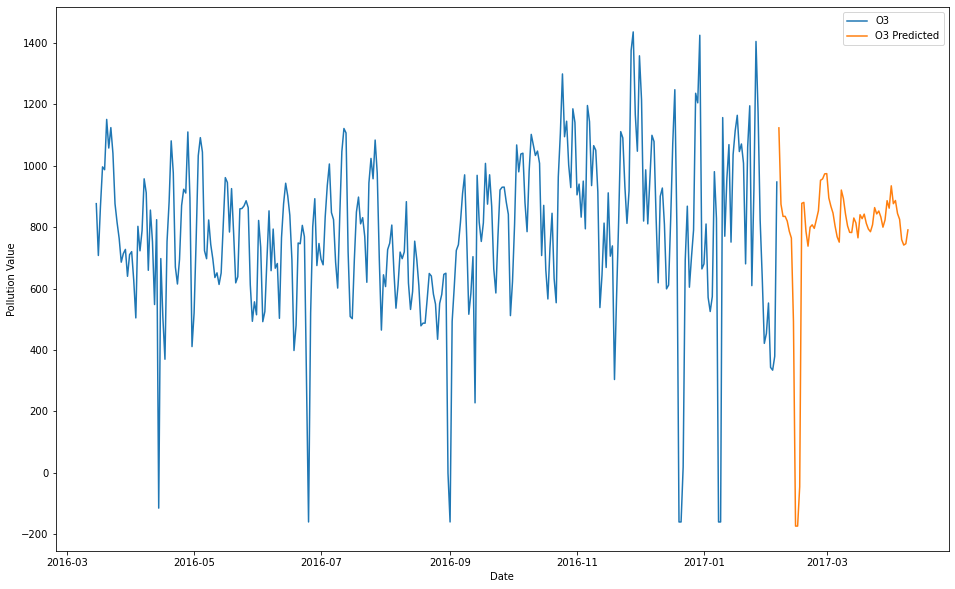

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['O3'], label='O3')
plt.plot(pred1.index,pred1['O3'], label='O3 Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

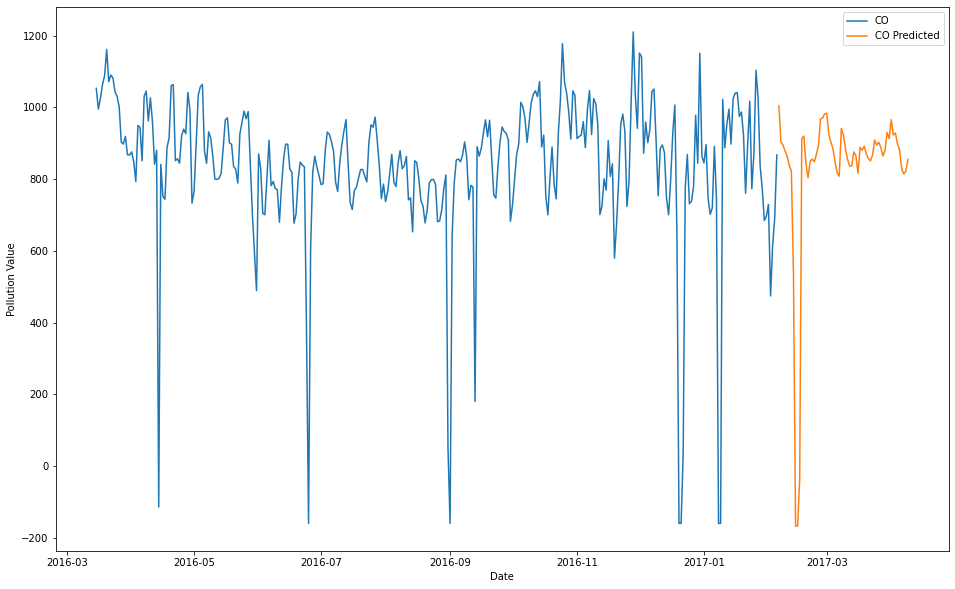

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['CO'], label='CO')
plt.plot(pred1.index,pred1['CO'], label='CO Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

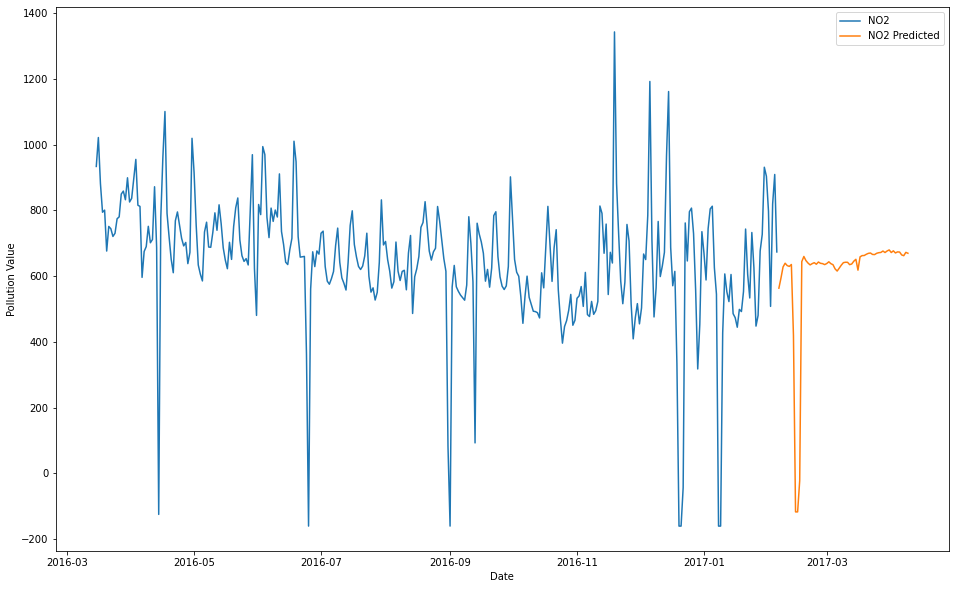

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['NO2'], label='NO2')
plt.plot(pred1.index,pred1['NO2'], label='NO2 Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

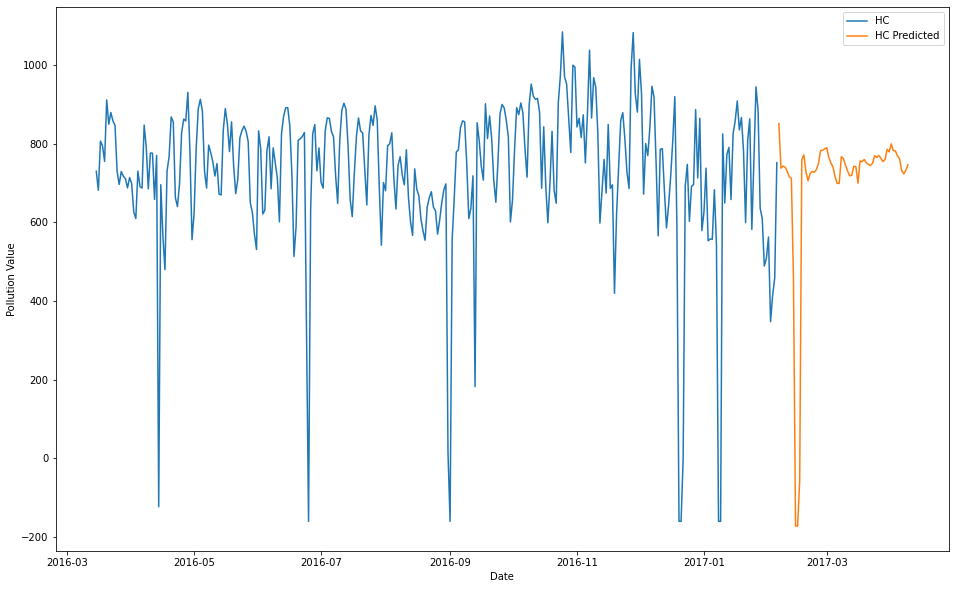

In [ ]:
#General time graph
plt.figure(figsize=(16,10))
plt.plot(df1.index,df1['HC'], label='HC')
plt.plot(pred1.index,pred1['HC'], label='HC Predicted')
plt.xlabel('Date')
plt.ylabel('Pollution Value')
plt.legend()
plt.show()

##### Submission

In [ ]:
finalResult=pd.concat([dfTest,pred1],axis=1)
finalResult.reset_index(inplace=True)
finalResult.columns=['Date','T','RH','O3','CO','NO2','HC']
finalResult=pd.melt(finalResult,id_vars=['Date','T','RH'],value_vars=['O3','CO','NO2','HC'],var_name='Gas',value_name='Value')
finalResult.sort_values(by=["Gas","Date"], inplace = True)
finalResult['id']=range(0,252)
finalResultSubmission=finalResult.drop(['Date','T','RH','Gas'],axis=1)
finalResultSubmission=finalResultSubmission[['id','Value']]
finalResultSubmission.to_csv('final3.csv', index = False, encoding='utf-8')

## After submission of these Models to Kaggle competition, VARMAX came out on top for the best RMSE score. 
I will be selecting this model, also because it has the lowest AIC and BIC scores on average